In [54]:
import numpy as np
from keras.datasets import mnist
from fc_net import *
from utils import *
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

np.warnings.filterwarnings('ignore')
np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print_shapes(X_train, y_train, X_test, y_test)
print("classes = ", list(np.unique(y_train)))

x_train.shape = (60000, 28, 28)
y_train.shape = (60000,)

x_test.shape = (10000, 28, 28)
y_test.shape = (10000,)

classes =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [56]:
# data preprocessing 
X_train, y_train, X_test, y_test = prepare_data(X_train, y_train, X_test, y_test)
print_shapes(X_train, y_train, X_test, y_test)
X_train, X_test = scale_data(X_train, X_test)

x_train.shape = (60000, 784)
y_train.shape = (60000, 10)

x_test.shape = (10000, 784)
y_test.shape = (10000, 10)



In [57]:
hidden_dims = [20,7,5,10]
lr = 0.009
batch_size = 64
iters = 9000000
min_epochs=40

In [58]:
### Experiments
def no_bn_no_do():
    results = L_layer_model(X_train, y_train, 
                            hidden_dims, 
                            learning_rate=lr, 
                            batch_size=batch_size, 
                            use_batchnorm=False, # no batch norm
                            dropout=1, # no dropout
                            num_iterations=iters, 
                            min_epochs=min_epochs)
    
    params, costs, accs, train_last_acc, val_last_acc = results
    test_acc = predict(X_test, y_test, params, use_batchnorm=False) # predict on test
    return costs, accs, train_last_acc, test_acc, val_last_acc


def yes_bn_no_do():
    results = L_layer_model(X_train, y_train, 
                            hidden_dims, 
                            learning_rate=lr, 
                            batch_size=batch_size, 
                            use_batchnorm=True, # yes batch norm
                            dropout=1, # no dropout
                            num_iterations=iters, 
                            min_epochs=min_epochs)
    
    params, costs, accs, train_last_acc, val_last_acc = results
    test_acc = predict(X_test, y_test, params, use_batchnorm=True) # predict on test
    return costs, accs, train_last_acc, test_acc, val_last_acc
    
    
def no_bn_yes_do():
    p=0.7
    results = L_layer_model(X_train, y_train, 
                            hidden_dims, 
                            learning_rate=lr, 
                            batch_size=batch_size, 
                            use_batchnorm=False, # no batch norm
                            dropout=p, # yes dropout
                            num_iterations=iters, 
                            min_epochs=min_epochs)
    
    params, costs, accs, train_last_acc, val_last_acc = results
    test_acc = predict(X_test, y_test, params, use_batchnorm=False) # predict on test
    return costs, accs, train_last_acc, test_acc, val_last_acc


In [59]:
def evaluate(experiment):
    costs, accs, train_last_acc, test_acc, val_last_acc = experiment()
    
    fig, axes = plt.subplots(1, 2)
    fig.set_figheight(7)
    fig.set_figwidth(14)

    # plot accuracy 
    axes[0].plot(accs)
    axes[0].set_title('Model Accuracy')
    axes[0].set_ylabel('accuracy')
    axes[0].set_xlabel('iteration (x100)')

    # plot loss
    axes[1].plot(costs)
    axes[1].set_title('Model Cost')
    axes[1].set_ylabel('cost')
    axes[1].set_xlabel('iteration (x100)')
    
    print()
    print('Train accuracy: {}\nValidation accuracy: {}\nTest accuracy: {}\n'.format(train_last_acc, val_last_acc, test_acc))
    

iteration step: 100 | cost: 2.006263088144477
iteration step: 200 | cost: 1.8278424780380038
iteration step: 300 | cost: 1.8624664753188993
iteration step: 400 | cost: 1.4237382659882045
iteration step: 500 | cost: 1.2321131445877727
iteration step: 600 | cost: 1.0830522398323619
iteration step: 700 | cost: 0.8812096458688731
iteration step: 800 | cost: 1.0912287970171723
iteration step: 900 | cost: 0.8019296040119479
iteration step: 1000 | cost: 0.9351355294298458
iteration step: 1100 | cost: 0.897763295247118
iteration step: 1200 | cost: 0.6621355679109495
iteration step: 1300 | cost: 0.5437082054764766
iteration step: 1400 | cost: 0.5334486992188199
iteration step: 1500 | cost: 0.6288236846778242
iteration step: 1600 | cost: 0.34027554852457687
iteration step: 1700 | cost: 0.4699731639256187
iteration step: 1800 | cost: 0.6944330328266346
iteration step: 1900 | cost: 0.4186250654042179
iteration step: 2000 | cost: 0.2821351357342986
iteration step: 2100 | cost: 0.41771605190966865
i

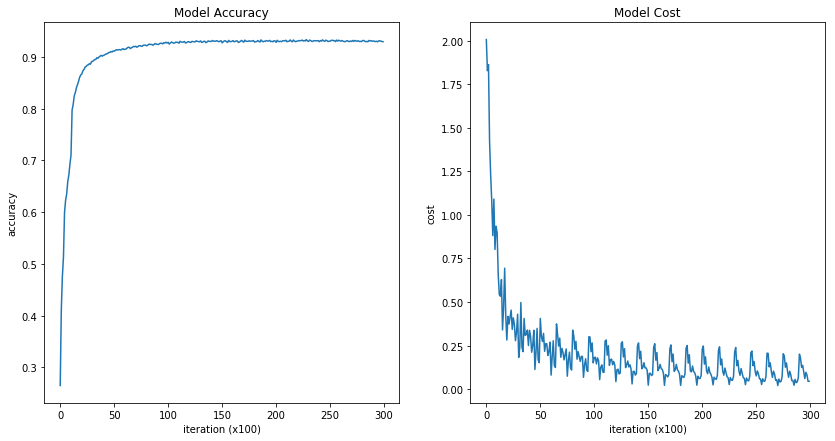

In [60]:
%%time
evaluate(no_bn_no_do)

iteration step: 100 | cost: 1.9510667036654368
iteration step: 200 | cost: 1.8153419705395835
iteration step: 300 | cost: 1.7306181722341434
iteration step: 400 | cost: 1.531412292257915
iteration step: 500 | cost: 1.462191793891681
iteration step: 600 | cost: 1.4905072181313477
iteration step: 700 | cost: 1.5086313292073585
iteration step: 800 | cost: 1.3187824517186928
iteration step: 900 | cost: 1.422962396718077
iteration step: 1000 | cost: 1.2262498186411908
iteration step: 1100 | cost: 1.268350877903752
iteration step: 1200 | cost: 1.222133393853778
iteration step: 1300 | cost: 0.8773557416549815
iteration step: 1400 | cost: 1.0407525578989025
iteration step: 1500 | cost: 1.1891909616165761
iteration step: 1600 | cost: 0.9475667307864162
iteration step: 1700 | cost: 1.0623726039008075
iteration step: 1800 | cost: 0.9418646416202179
iteration step: 1900 | cost: 0.7268659038256733
iteration step: 2000 | cost: 0.8596409446815142
iteration step: 2100 | cost: 0.8516527404596843
iterat

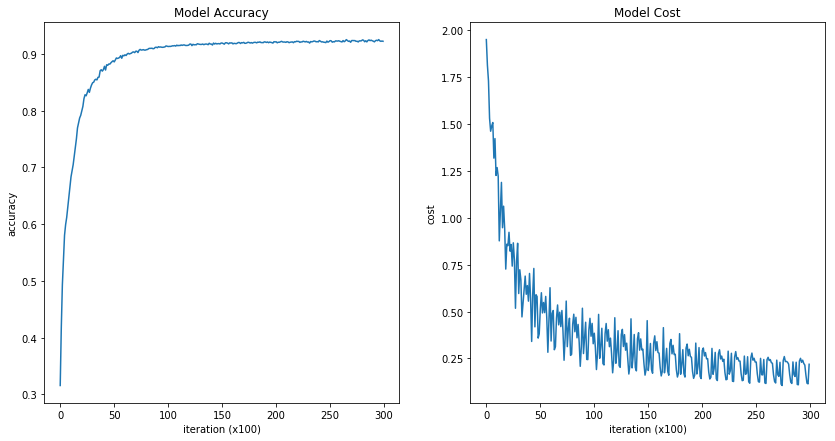

In [61]:
%%time
evaluate(yes_bn_no_do)

iteration step: 100 | cost: 2.238585469885022
iteration step: 200 | cost: 2.3199254818598853
iteration step: 300 | cost: 2.191707802481632
iteration step: 400 | cost: 2.255600811823969
iteration step: 500 | cost: 2.3070062785832937
iteration step: 600 | cost: 2.2250581764229134
iteration step: 700 | cost: 2.1573364152761654
iteration step: 800 | cost: 2.1963543855239367
iteration step: 900 | cost: 2.1093895110768224
iteration step: 1000 | cost: 2.0294454846656427
iteration step: 1100 | cost: 2.2684124521408187
iteration step: 1200 | cost: 1.9891710664360296
iteration step: 1300 | cost: 2.0159004449186995
iteration step: 1400 | cost: 2.0702179334844018
iteration step: 1500 | cost: 2.121514191115921
iteration step: 1600 | cost: 2.0449280375567795
iteration step: 1700 | cost: 1.990223752086739
iteration step: 1800 | cost: 2.08609508327047
iteration step: 1900 | cost: 1.951480292493611
iteration step: 2000 | cost: 1.8807633472993295
iteration step: 2100 | cost: 2.024317853284043
iteration 

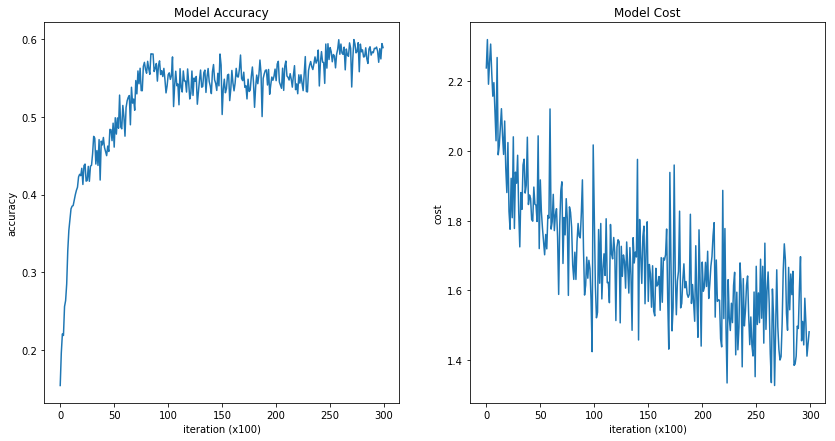

In [62]:
%%time
evaluate(no_bn_yes_do)